# Normal Distributions

### Integrating Normal PDFs

Let $X$ ~ $N(\mu, {\sigma}^{2})$. Then, the probability $P(X = x)$ is given by the integral of the normally distributed random variable's probability density function (PDF), which in this case is the normal (Gaussian) distribution. Specifically, the PDF of $X$ is:

\begin{equation*}
f(x) = \frac{1}{\sigma \sqrt{2 \pi}} {e}^{-\frac{{x - \mu}^{2}}{2 {\sigma}^{2}}}
\label{eq:1} \tag{1}
\end{equation*}

And the probability we're trying to solve for is:

\begin{equation*}
\begin{split}
P(X = x) &= \int_{-\infty}^{\infty} f(x) dx \\
&= \frac{1}{\sigma \sqrt{2 \pi}} \int_{-\infty}^{\infty} {e}^{-\frac{{x - \mu}^{2}}{2 {\sigma}^{2}}} dx
\end{split}
\label{eq:2} \tag{2}
\end{equation*}

This is going to be difficult to solve without using polar coordinates, so the next few steps will be setting us up for that. First, let's define $u = \frac{x - \mu}{\sigma}$ and $du = \frac{dx}{\sigma}$. The probability can then be rewritten as:

\begin{equation*}
P(x) = \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{\infty} {e}^{-\frac{1}{2} {u}^{2}} du
\label{eq:3} \tag{3}
\end{equation*}

To get the 2D cartesian plane variables needed for the polar coordinates conversion, we can square $P(x)$ and substitute one factor of $P(x)$ with $P(v)$ (where $u = v$): 

\begin{equation*}
\begin{split}
{P(x)}^{2} &= P(x)P(v) \\
&= \biggl(\frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{\infty} {e}^{-\frac{1}{2} {u}^{2}} du\biggr) \biggl(\frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{\infty} {e}^{-\frac{1}{2} {v}^{2}} dv \biggr) \\
&= \frac{1}{2 \pi} \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} {e}^{-\frac{{u}^{2} + {v}^{2}}{2}} dudv
\end{split}
\label{eq:4} \tag{4}
\end{equation*}

Now, we're ready to use polar coordinates. Our integral is from $-\infty$ to $\infty$ for both $u$ and $v$, which covers the entire cartesian plane. In terms of $r$ and $\theta$, that's $0 \leq \theta \leq 2\pi$ and $0 \leq r \leq \infty$. So,

\begin{equation*}
\begin{split}
u = r \cos \theta \\
v = r \sin \theta
\end{split}
\label{eq:5} \tag{5}
\end{equation*}

Plugging those back into ${P(x)}^2$, we have:

\begin{equation*}
{P(x)}^{2} = \frac{1}{2 \pi} \int_{0}^{2\pi} \int_{0}^{\infty} {e}^{-\frac{r{\cos}^{2}\theta + r{\sin}^{2}\theta}{2}} \lvert J\lvert dr d\theta
\label{eq:6} \tag{6}
\end{equation*}

And, solving for the determinant of the Jacobian, we have:

\begin{equation*}
\begin{split}
\lvert J \lvert &= \begin{vmatrix}
\frac{\delta u}{\delta\theta} & \frac{\delta u}{\delta r} \\
\frac{\delta v}{\delta\theta} & \frac{\delta v}{\delta r} 
\end{vmatrix} = \begin{vmatrix}
-r \sin \theta & \cos \theta \\
r \cos \theta & \sin \theta
\end{vmatrix} \\
&= \lvert (-r \sin \theta)(\sin \theta) - (r \cos \theta)(\cos \theta)\lvert \\
& = \lvert -r({\cos}^{2}\theta + {\sin}^{2}\theta) \lvert = \lvert -r \lvert = r
\end{split}
\label{eq:7} \tag{7}
\end{equation*}

This makes ${P(x)}^{2}$ a lot simpler to solve. Using substitution again, let's set $w = \frac{{r}^{2}}{2}$ and $dw = rdr$:  

\begin{equation*}
\begin{split}
{P(x)}^{2} &= \frac{1}{2 \pi} \int_{0}^{2\pi} \biggl[\int_{0}^{\infty} {e}^{-w} dw\biggr] d\theta = \frac{1}{2 \pi} \int_{0}^{2\pi} {\biggl[-{e}^{-w} \biggr]}^{\infty}_{0} d\theta \\
& = \frac{1}{2 \pi} \int_{0}^{2\pi} d\theta = \frac{1}{2 \pi} {\biggl[\theta\biggr]}^{2\pi}_{0} = 1
\end{split}
\label{eq:8} \tag{8}
\end{equation*}

Therefore, $P(X = x) = 1$.

### Example

Using [this HackerRank problem](https://www.hackerrank.com/challenges/normal-distribution-1/problem) as an example, we have $X$ ~ $N(30, 16)$ and want to find $P(x < 40)$, $P(x > 21)$, and $P(30 < x < 35)$. Note that instead of using +/- $\infty$, we can use $\mu$ +/- $4\sigma$.

In [44]:
from scipy.integrate import quad
import scipy.stats

mean = 30.0 
std = 4.0

def normal_distribution(x):
    return scipy.stats.norm.pdf(x, mean, std)

def solve(x1, x2):
    res, err = quad(normal_distribution, x1, x2)
    return round(res, 3)
 
print("P(x < 40) = ", solve(mean - 4*std, 40))
print("P(x > 21) = ", solve(21, mean + 4*std))
print("P(30 < x < 35) = ", solve(30, 35))

P(x < 40) =  0.994
P(x > 21) =  0.988
P(30 < x < 35) =  0.394


The following is a visual representation of the last probability solved above:

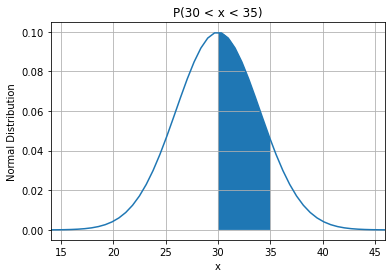

In [45]:
import matplotlib.pyplot as plt

# Plot normal distribution
x_min = mean - 4*std
x_max = mean + 4*std
x = np.linspace(x_min, x_max)
y = normal_distribution(x)
plt.plot(x, y)

# Plot probability
px = np.linspace(30, 35)
py = normal_distribution(px)
plt.fill_between(px, py)

# Fix plot settings
plt.grid()
plt.xlim(x_min,x_max)
plt.title('P(30 < x < 35)')
plt.xlabel('x')
plt.ylabel('Normal Distribution')
plt.show()